## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_study_merge = pd.merge(study_results, mouse_metadata,how='outer', on="Mouse ID")

# Display the data table for preview
mouse_study_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22



## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mouse_study_merge.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,19.572108,50.448381,1.021659,12.814580,25.662441
std,14.079460,8.894722,1.137974,7.189592,3.921622
min,0.000000,22.050126,0.000000,1.000000,15.000000
25%,5.000000,45.000000,0.000000,7.000000,25.000000
50%,20.000000,48.951474,1.000000,13.000000,27.000000
75%,30.000000,56.292200,2.000000,20.000000,29.000000
max,45.000000,78.567014,4.000000,24.000000,30.000000


## Bar plots

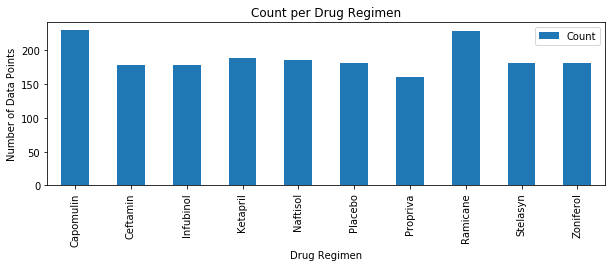

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
grouped_df = pd.DataFrame(mouse_study_merge.groupby(["Drug Regimen"]).count()).reset_index()


# Filter the DataFrame down only to those columns to chart
datapoints_for_regimen = grouped_df[["Drug Regimen","Mouse ID"]]
datapoints_for_regimen = datapoints_for_regimen.rename(columns={"Mouse ID": "Count"})

# Set the index to be "Drug Regimen" so they will be used as labels
datapoints_for_regimen = datapoints_for_regimen.set_index("Drug Regimen")

# Use DataFrame.plot() in order to create a bar chart of the data

regimen_chart= datapoints_for_regimen.plot(kind="bar", figsize=(10,3))

# Set a title for the chart

regimen_chart.set_ylabel("Number of Data Points")
plt.title("Count per Drug Regimen")

plt.show()





Text(0, 0.5, 'Number of Data Points')

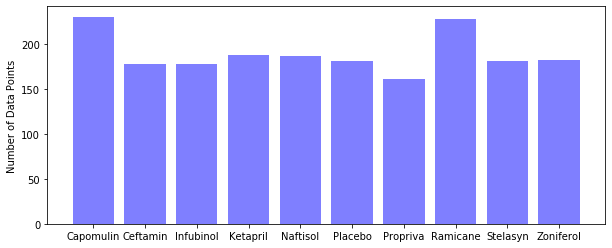

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
#Regimen and Column to convert to list
drug_regimens = datapoints_for_regimen.index.tolist()

count_regimen = (mouse_study_merge.groupby(["Drug Regimen"])["Age_months"].count()).tolist()

x_axis = np.arange(len(count_regimen))

# Define x-axis
x_axis = drug_regimens


# Create a bar chart based upon the above data
plt.figure(figsize=(10,4))
plt.bar(x_axis, count_regimen, color='b', alpha=0.5, align="center")
plt.ylabel("Number of Data Points")

## Pie plots

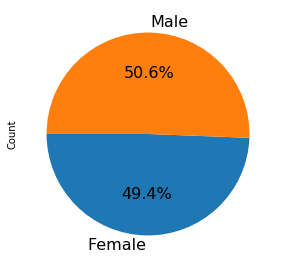

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_df = pd.DataFrame(mouse_study_merge.groupby(["Sex"]).count()).reset_index()

# Filter the DataFrame down only to those columns to chart
mice_df = mice_df[["Sex","Mouse ID"]]
mice_df = mice_df.rename(columns={"Mouse ID": "Count"})

# plot chart
plt.figure(figsize=(10,6))
ax1 = plt.subplot(121, aspect='equal')

mice_df.plot(kind='pie', y = "Count", ax=ax1, autopct='%1.1f%%', 
startangle=180, shadow=False, labels=mice_df['Sex'], legend = False, fontsize=16)




(-1.1022210380848285,
 1.1046567928362272,
 -1.2101537272442933,
 1.1077121695699783)

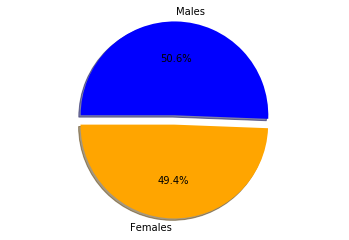

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Convert Columns into lists
gender_count = (mouse_study_merge.groupby(["Sex"])["Age_months"].count()).tolist()
# Labels for the sections of our pie chart
labels = ["Females", "Males"]

# The colors of each section of the pie chart
colors = ["orange", "blue"]

# seperate the "Humans" section from the others
explode = (0.1, 0)

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(gender_count, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")


## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
mouse_study_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [8]:
sorted_df = mouse_study_merge.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)
# Select final volume of each mouse 
max_df = sorted_df.loc[sorted_df["Timepoint"] == 45]
max_df.head().reset_index()

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,9,b128,45,38.982878,2,Capomulin,Female,9,22
1,1710,b742,45,38.939633,0,Capomulin,Male,7,21
2,1834,g288,45,37.074024,1,Capomulin,Male,3,19
3,1824,g316,45,40.159220,2,Capomulin,Female,22,22
4,1867,i557,45,47.685963,1,Capomulin,Female,1,24


In [9]:
# Select data for Capomulin regimen and reset index
cap_data_df = max_df[max_df['Drug Regimen'].isin(['Capomulin'])]

# Select data for Infubinol regimen and reset index
inf_data_df = max_df[max_df['Drug Regimen'].isin(['Infubinol'])]

# Select data for Ramicane regimen and reset index
ram_data_df = max_df[max_df['Drug Regimen'].isin(['Ramicane'])]

# Select data for Ceftamin regimen and reset index
cef_data_df = max_df[max_df['Drug Regimen'].isin(['Ceftamin'])]

                                 

In [10]:
# Convert column "Tumor Volume" of the Capomulin regimen into a dataframe object
cap_list = cap_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
cap_list = cap_list["Tumor Volume (mm3)"]

# Convert column "Tumor Volume" of the Ramicane regimen into a dataframe object
ram_list = ram_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
ram_list = ram_list["Tumor Volume (mm3)"]

# Convert column "Tumor Volume" of the Infubinol regimen into a dataframe object
inf_list = inf_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
inf_list = inf_list["Tumor Volume (mm3)"]

# Convert column "Tumor Volume" of the Ceftamin regimen into a dataframe object
cef_list = cef_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
cef_list = cef_list["Tumor Volume (mm3)"]



In [11]:

quartiles = cap_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 32.37735684
The upper quartile of temperatures is: 40.1592203
The interquartile range of temperatures is: 7.781863460000004
The the median of temperatures is: 37.31184577 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [12]:

quartiles = ram_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 30.981175224999998
The upper quartile of temperatures is: 38.508305307499995
The interquartile range of temperatures is: 7.527130082499998
The the median of temperatures is: 34.848627300000004 
Values below 19.690480101250003 could be outliers.
Values above 49.79900043124999 could be outliers.


In [13]:

quartiles = inf_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 62.75445141
The upper quartile of temperatures is: 67.68556862
The interquartile range of temperatures is: 4.9311172099999965
The the median of temperatures is: 66.08306589 
Values below 55.35777559500001 could be outliers.
Values above 75.08224443499999 could be outliers.


In [14]:

quartiles = cef_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 61.43389223
The upper quartile of temperatures is: 67.52748237
The interquartile range of temperatures is: 6.093590140000003
The the median of temperatures is: 64.29983003 
Values below 52.29350701999999 could be outliers.
Values above 76.66786758 could be outliers.


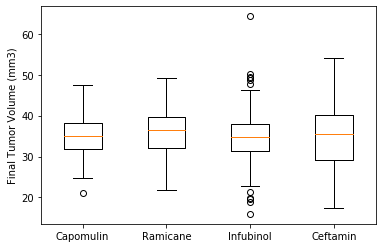

In [24]:
fig, axes = plt.subplots(ncols=1)


all_data= (cap_list,ram_list,inf_list,cef_list)
all_data = [np.random.normal(35, med, 65) for med in range(6, 10)]


# plot box plot

axes.boxplot(all_data)

# add x-tick labels
plt.setp(axes, xticks=[y + 1 for y in range(len(all_data))],
         xticklabels=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
axes.set_ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and scatter plots

In [25]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# Create a new DataFrame that looks into Capomulin
capomulin_df = mouse_study_merge.loc[mouse_study_merge["Drug Regimen"] == "Capomulin"]
capomulin_df = capomulin_df.reset_index()
capomulin_df.head()

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,0,b128,0,45.000000,0,Capomulin,Female,9,22
1,1,b128,5,45.651331,0,Capomulin,Female,9,22
2,2,b128,10,43.270852,0,Capomulin,Female,9,22
3,3,b128,15,43.784893,0,Capomulin,Female,9,22
4,4,b128,20,42.731552,0,Capomulin,Female,9,22


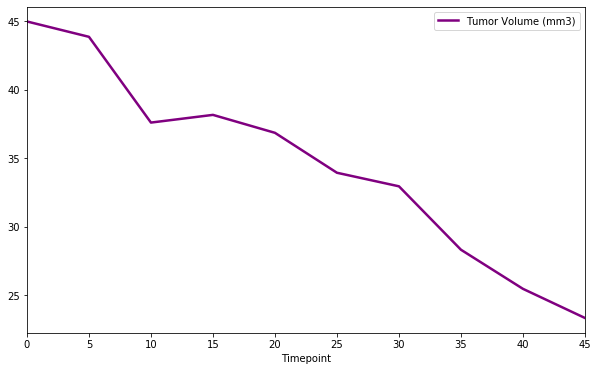

In [26]:
# Select data of a single mouse
cap_single_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185"]
# Selecting only 2 columns
cap_single_df = cap_single_df.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
#capomulin_df.index
#Reset the index
cap_single_df = cap_single_df.reset_index(drop=True)
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cap_single_df.set_index('Timepoint').plot(figsize=(10, 6), linewidth=2.5, color='purple')



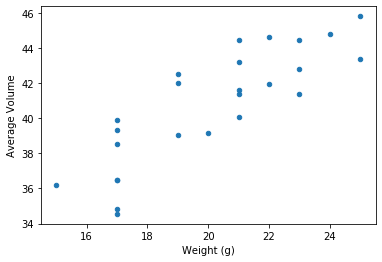

In [30]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
reduced_df = capomulin_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
# Calculate average tumor volume for each mouse in the Capomulin regimen
average_cap = pd.DataFrame(reduced_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()

# Rename Tumor Volume column
average_cap = average_cap.rename(columns={"Tumor Volume (mm3)": "Average Volume"})


 #Set the 'Mouse ID' as our index
average_cap = average_cap.set_index('Mouse ID')

average_cap.plot(kind="scatter", x="Weight (g)", y="Average Volume")


plt.show()

In [28]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
mouse_weight = average_cap.iloc[:,0]
avg_tumor_volume = average_cap.iloc[:,1]
correlation_coefficient = st.pearsonr(mouse_weight,avg_tumor_volume)
print(f"The correlation between both factors is {round(correlation_coefficient[0],2)}")

The correlation between both factors is 0.84


The r-squared is: 0.7088568047708717


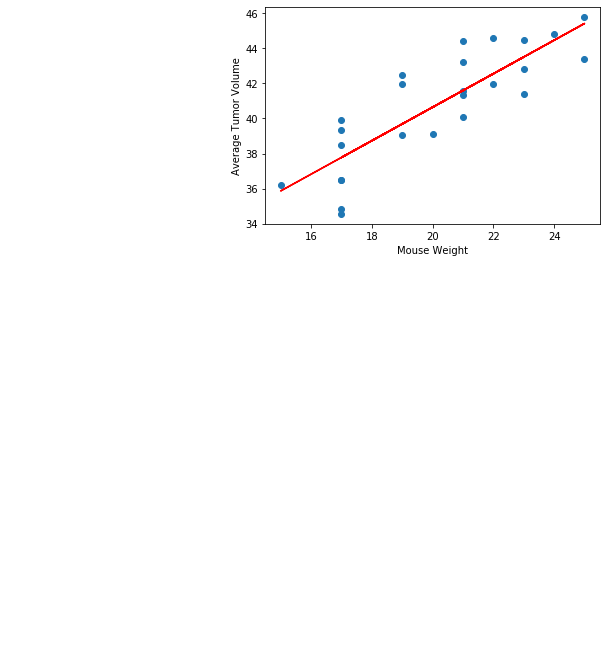

In [22]:
# Add the linear regression equation and line to plot
x_values = average_cap['Weight (g)']
y_values = average_cap['Average Volume']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
print(f"The r-squared is: {rvalue**2}")
plt.show()